# **PERCEPTRON FROM SCRATCH**
**`Step 1:`** Given Data ( X, w, Y, b, n)

**`Step 2:`** Compute Net Input (z) = wixi + b

**`Step 3:`** Apply Activation Function (if z>=0 then 1 else 0)

**`Step 4:`** Calculate Error (loss = y - y_predicted)

           Check if output match target print result otherwise step 5

**`Step 5:`** Weight Update Decision

**`Step 6:`** Bias update

**`Step 7:`** Print Results

In [ ]:
# Step 1: Given Data
X = [0.75, 0.65, 0.80]    # Input features
w = [0.4, 0.3, 0.5]       # Initial weights
b = -0.2                  # Initial bias
Y = 1                     # Target output
n = 0.01                  # Learning rate

# Step 2: Compute Net Input
z = w[0]*x[0] + w[1]*x[1] + w[2]*x[2] + b
print("Net input (z):", z)

# Step 3: Apply Activation Function
if z >= 0:
    y_pred = 1    # Pass
else:
    y_pred = 0    # Fail
print("Predicted Output:", y_pred)

# Step 4: Calculate Error
loss = Y - y_pred
print("Loss:", loss)

if loss == 0:
    print("Prediction matches target. No update required.")
else:
    print("Prediction is wrong. Updating weights...")

    # Step 5: Weight Update Decision
    for i in range(len(w)):
        w[i] += n * loss * X[i]
        print("Updated weights:", w)

    # Step 6: Bias Update
    b = b + n * loss
    print("Updated bias:", b)

# Step 7: Print Results

NameError: name 'x' is not defined

# **MULTI LAYER PERCEPTRON**

**`Step 1:`** Given Data (X, n, y, w(hidden), bias, weight(output))

**`Step 2:`** Activation Function - Sigmoid

**`Step 3:`** Compute Weights input -> Forward Pass

    Hidden layer
    Output layer
**`Step 4:`** Error Check (same logic)

**`Step 5:`** Backpropagation (simple)

    Update hidden → output weights
    Update input → hidden weights

**`Step 6:`** Final Output

In [ ]:
import math                         # 3 Inputs  →  2 Hidden Neurons  →  1 Output Neuron

inputs = [0.75, 0.65, 0.80]         # Input 3 features of 1 data sample
w_ih = [                            # Input → Hidden weights (3x2)
    [0.4, 0.3],    # [hidden 1, hidden 2]
    [0.3, 0.2],
    [0.5, 0.4]
]
b_h = [0.1, -0.1]                   # Hidden biases

w_ho = [0.6, -0.4]                  # Hidden → Output weights
b_o = -0.2                           # Output bias

y_target = 1                         # Target output
lr = 0.01                            # Learning rate

In [ ]:
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

In [ ]:
# Step 3: Forward Pass (Input → Hidden)
hidden_out = []                        # store active outputs of hidden nueron

for h in range(2):                     # Loop over hidden neurons(2)
    z_h = sum(inputs[i] * w_ih[i][h] for i in range(3)) + b_h[h]       # zh​=(x1​⋅w1h​)+(x2​⋅w2h​)+(x3​⋅w3h​)+bh​
    hidden_out.append(sigmoid(z_h))                                    # hidden_out = [h1, h2]


# Hidden → Output
z_o = sum(hidden_out[h] * w_ho[h] for h in range(2)) + b_o
y_pred_prob = sigmoid(z_o)
y_pred = 1 if y_pred_prob >= 0.5 else 0

print("Predicted output:", y_pred)

Predicted output: 0


In [ ]:
# Step 4: Compute Error
loss = y_target - y_pred
print("Loss:", loss)

if loss == 0:
    print("Prediction is correct. No update required.")
else:
    print("Prediction is wrong. Updating weights...")

    # Step 5: Backpropagation
    output_grad = loss

    # Update Hidden → Output weights
    for h in range(2):
        w_ho[h] += lr * output_grad * hidden_out[h]
    b_o += lr * output_grad

    # Update Input → Hidden weights
    for h in range(2):
        hidden_grad = hidden_out[h] * (1 - hidden_out[h]) * output_grad
        for i in range(3):
            w_ih[i][h] += lr * hidden_grad * inputs[i]
        b_h[h] += lr * hidden_grad

Loss: 1
Prediction is wrong. Updating weights...


In [ ]:
# Step 6 : Final Output
print("Updated input-hidden weights:", w_ih)
print("Updated hidden-output weights:", w_ho)
print("Updated hidden biases:", b_h)
print("Updated output bias:", b_o)


Updated input-hidden weights: [[0.40443398000130343, 0.3051845284321577], [0.30384278266779635, 0.20449325797453669], [0.504729578668057, 0.4055301636609682]]
Updated hidden-output weights: [0.6219022315194335, -0.38080251709786794]
Updated hidden biases: [0.10591197333507127, -0.09308729542378971]
Updated output bias: -0.16999999999999998


**LOSS CURVE**

# **MULTILAYER PRCEPTRON (WITH LIBRARY)**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[0.75, 0.65, 0.8]])   # Input (normalized)
y = np.array([[1]])                 # Target

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid',  input_shape=(3,) ),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

In [ ]:
history = model.fit( X, y, epochs=200, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Final Prediction: [[0.9001101]]


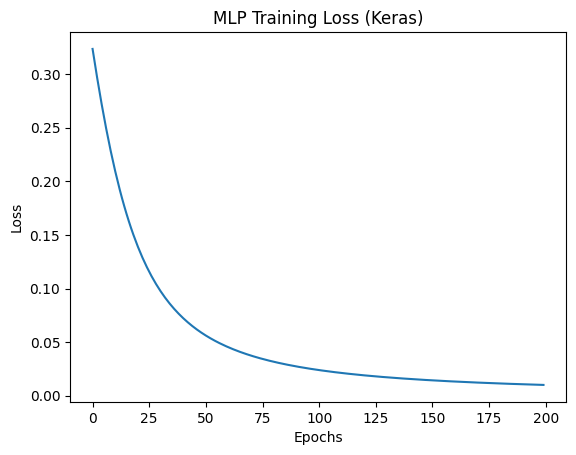

In [ ]:
prediction = model.predict(X)
print("Final Prediction:", prediction)
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("MLP Training Loss (Keras)")
plt.show()